# Tips

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

## 데이터

In [3]:
x_train = torch.FloatTensor([[1, 2, 1],
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ])

y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])

In [4]:
x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
y_test = torch.LongTensor([2, 2, 2])

## Model

In [5]:
torch.unique(y_train)

tensor([0, 1, 2])

In [6]:
len(torch.unique(y_train))

3

In [7]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(x_train.shape[1],len(torch.unique(y_train)))
    def forward(self, x):
        return self.linear(x)

In [8]:
model = SoftmaxClassifierModel()

In [9]:
def train(model, optimizer, x_train, y_train):
    epochs = 20
    for epoch in range(epochs):
        # H(x) 
        pred = model(x_train)

        # cost
        cost = F.cross_entropy(pred, y_train)

        # cost 로  H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        correct_pred = pred.argmax(dim = 1)
        correct_pred = (correct_pred == y_train)
        accuracy = correct_pred.sum().float() / float(y_train.size(0)) * 100

        print("Train Accuracy: {:2.2f}% Cost: {:.4f}".format(
            accuracy, cost.item()
        ))


In [10]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [11]:
train(model, optimizer, x_train, y_train)

Train Accuracy: 50.00% Cost: 2.2037
Train Accuracy: 37.50% Cost: 1.1996
Train Accuracy: 37.50% Cost: 1.1430
Train Accuracy: 25.00% Cost: 1.1178
Train Accuracy: 37.50% Cost: 1.1009
Train Accuracy: 25.00% Cost: 1.0895
Train Accuracy: 37.50% Cost: 1.0799
Train Accuracy: 25.00% Cost: 1.0713
Train Accuracy: 50.00% Cost: 1.0633
Train Accuracy: 37.50% Cost: 1.0557
Train Accuracy: 50.00% Cost: 1.0484
Train Accuracy: 37.50% Cost: 1.0412
Train Accuracy: 62.50% Cost: 1.0343
Train Accuracy: 50.00% Cost: 1.0275
Train Accuracy: 62.50% Cost: 1.0208
Train Accuracy: 50.00% Cost: 1.0143
Train Accuracy: 62.50% Cost: 1.0079
Train Accuracy: 50.00% Cost: 1.0016
Train Accuracy: 62.50% Cost: 0.9954
Train Accuracy: 50.00% Cost: 0.9894


In [12]:
def test(model, optimizer, x_test, y_test):
    
    pred = model(x_test)
    cost = F.cross_entropy(pred, y_test)
    correct_pred = pred.argmax(dim = 1)
    correct_count = (correct_pred == y_test).sum().float()
    accuracy = correct_count / float(y_test.size(0)) * 100

    print("Test Accuracy: {:2.2f}% Cost: {:.4f}".format(
            accuracy, cost.item()
    ))

In [13]:
test(model, optimizer, x_test, y_test)

Test Accuracy: 0.00% Cost: 1.4258


## Learning Rate

Gradient Descent 에서의  α  값

optimizer = optim.SGD(model.parameters(), lr=0.1) 에서 lr=0.1 이다

learning rate이 너무 크면 diverge 하면서 cost 가 점점 늘어난다 (overshooting).

In [14]:
model = SoftmaxClassifierModel()

In [15]:
optimizer = optim.SGD(model.parameters(), lr = 1e5)

In [16]:
train(model, optimizer, x_train, y_train)

Train Accuracy: 50.00% Cost: 1.2803
Train Accuracy: 25.00% Cost: 976950.7500
Train Accuracy: 37.50% Cost: 1279135.1250
Train Accuracy: 37.50% Cost: 1198378.8750
Train Accuracy: 25.00% Cost: 1098825.7500
Train Accuracy: 37.50% Cost: 1968197.6250
Train Accuracy: 25.00% Cost: 284763.2812
Train Accuracy: 37.50% Cost: 1532260.1250
Train Accuracy: 37.50% Cost: 1651503.8750
Train Accuracy: 25.00% Cost: 521878.5000
Train Accuracy: 25.00% Cost: 1397263.2500
Train Accuracy: 50.00% Cost: 750986.2500
Train Accuracy: 37.50% Cost: 918691.3750
Train Accuracy: 25.00% Cost: 1487888.2500
Train Accuracy: 37.50% Cost: 1582260.1250
Train Accuracy: 37.50% Cost: 685818.1250
Train Accuracy: 50.00% Cost: 1140048.7500
Train Accuracy: 37.50% Cost: 940566.3750
Train Accuracy: 25.00% Cost: 931638.2500
Train Accuracy: 37.50% Cost: 1971322.6250


learning rate이 너무 작으면 cost가 거의 줄어들지 않는다.

In [17]:
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=1e-10)
train(model, optimizer, x_train, y_train)

Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873
Train Accuracy: 37.50% Cost: 3.1873


적절한 숫자로 시작해 발산하면 작게, cost가 줄어들지 않으면 크게 조정하자.

In [18]:
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=0.1)
train(model, optimizer, x_train, y_train)

Train Accuracy: 37.50% Cost: 1.3416
Train Accuracy: 37.50% Cost: 1.1988
Train Accuracy: 37.50% Cost: 1.1509
Train Accuracy: 50.00% Cost: 1.1320
Train Accuracy: 37.50% Cost: 1.1162
Train Accuracy: 50.00% Cost: 1.1025
Train Accuracy: 37.50% Cost: 1.0897
Train Accuracy: 50.00% Cost: 1.0775
Train Accuracy: 50.00% Cost: 1.0658
Train Accuracy: 50.00% Cost: 1.0545
Train Accuracy: 50.00% Cost: 1.0437
Train Accuracy: 50.00% Cost: 1.0332
Train Accuracy: 50.00% Cost: 1.0231
Train Accuracy: 50.00% Cost: 1.0134
Train Accuracy: 50.00% Cost: 1.0040
Train Accuracy: 50.00% Cost: 0.9949
Train Accuracy: 50.00% Cost: 0.9862
Train Accuracy: 50.00% Cost: 0.9778
Train Accuracy: 50.00% Cost: 0.9697
Train Accuracy: 50.00% Cost: 0.9618


## Data Preprocessing (데이터 전처리)

In [19]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
                             
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

$ x'_j = \frac{x_j - \mu_j}{\sigma_j} $

In [20]:
mu = x_train.mean(dim = 0)
sigma = x_train.std(dim = 0)
norm_x_train = (x_train - mu) / sigma
print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


Normalize와 zero center한 X로 학습해서 성능을 보자

In [21]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(x_train.shape[1], 1)

    def forward(self, x):
        return self.linear(x)

In [39]:
model = MultivariateLinearRegressionModel()

In [40]:
optimizer = optim.SGD(model.parameters(), lr = 1e-1)

In [41]:
def train(model, optimizer, x_train, y_train):
    epochs = 20
    for epoch in range(epochs):
        # H(x) 
        pred = model(x_train)

        # cost
        cost = F.mse_loss(pred, y_train)

        # cost 로  H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print("Train Cost: {:.4f}".format(
            cost.item()
        ))


In [42]:
train(model, optimizer, norm_x_train, y_train)

Train Cost: 29602.0879
Train Cost: 18798.4785
Train Cost: 11988.4453
Train Cost: 7660.3726
Train Cost: 4899.2344
Train Cost: 3134.6699
Train Cost: 2006.0905
Train Cost: 1284.0112
Train Cost: 821.9371
Train Cost: 526.2225
Train Cost: 336.9651
Train Cost: 215.8362
Train Cost: 138.3088
Train Cost: 88.6862
Train Cost: 56.9230
Train Cost: 36.5898
Train Cost: 23.5719
Train Cost: 15.2360
Train Cost: 9.8969
Train Cost: 6.4757


## Overfitting
너무 학습 데이터에 한해 잘 학습해 테스트 데이터에 좋은 성능을 내지 못할 수도 있다.

이것을 방지하는 방법은 크게 세 가지인데:

1. 더 많은 학습 데이터
2. 더 적은 양의 feature
3. **Regularization**

In [43]:
def train_with_regularization(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # l2 norm 계산
        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param)
            
        cost += l2_reg

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch+1, nb_epochs, cost.item()
        ))

In [44]:
model = MultivariateLinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=1e-1)
train_with_regularization(model, optimizer, norm_x_train, y_train)

Epoch    1/20 Cost: 29475.767578
Epoch    2/20 Cost: 18791.171875
Epoch    3/20 Cost: 12053.740234
Epoch    4/20 Cost: 7769.610352
Epoch    5/20 Cost: 5035.856934
Epoch    6/20 Cost: 3288.601074
Epoch    7/20 Cost: 2171.032715
Epoch    8/20 Cost: 1455.978271
Epoch    9/20 Cost: 998.392273
Epoch   10/20 Cost: 705.545166
Epoch   11/20 Cost: 518.118896
Epoch   12/20 Cost: 398.159241
Epoch   13/20 Cost: 321.377869
Epoch   14/20 Cost: 272.230255
Epoch   15/20 Cost: 240.768921
Epoch   16/20 Cost: 220.626984
Epoch   17/20 Cost: 207.729843
Epoch   18/20 Cost: 199.469604
Epoch   19/20 Cost: 194.177429
Epoch   20/20 Cost: 190.785126


# Mnist

In [45]:
# Lab 7 Learning rate and Evaluation
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [46]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

cuda


In [47]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# parameters


In [48]:
training_epochs = 15
batch_size = 100

In [49]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                           batch_size = batch_size,
                                           shuffle = True,
                                           drop_last = True)

In [56]:
len(data_loader)

600

In [54]:
# Mnist data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias = True).to(device)

In [55]:
loss = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [62]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader) # 600

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        pred = linear(X)
        cost = loss(pred, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
    
    print('Epoch: {:04d} cost: {:.4f}'.format(epoch + 1, avg_cost))

Epoch: 0001 cost: 0.3311
Epoch: 0002 cost: 0.3166
Epoch: 0003 cost: 0.3071
Epoch: 0004 cost: 0.3002
Epoch: 0005 cost: 0.2949
Epoch: 0006 cost: 0.2908
Epoch: 0007 cost: 0.2874
Epoch: 0008 cost: 0.2846
Epoch: 0009 cost: 0.2818
Epoch: 0010 cost: 0.2799
Epoch: 0011 cost: 0.2778
Epoch: 0012 cost: 0.2760
Epoch: 0013 cost: 0.2744
Epoch: 0014 cost: 0.2731
Epoch: 0015 cost: 0.2717


Accuracy: 0.8884999752044678
Label:  5
Prediction:  8


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


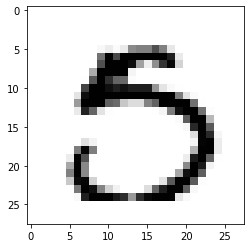

In [71]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()